# Machine Learning
In this file you can see the documented observations from the PDF file. We have seprepated everything into all the questions. In this document there are different functionalities what describes the predicted number of cases. We have used the Linear Regression, Polynomial Regression and the Multiple Linear Regression. For now go ahead a scroll down to the question you are searching for.

##### Linear Regression
With a linear regression you can calculate the mean of all datapoints. We have used the LinearRegression function from the SKLearn library. This library also gives the user the possibility to calculate the accuracy score of the predicted line. But first we need to import all the libraries

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score        # optional for our example

Now we need to import the information and do some data preparation. We import the data and from the hole dataset we set the Null values to a 0. We do this to have more data to work with, else we think we lose to much information. Than we want the dataset from only the Netherlands. Than we plot the date on a X variable, and the total cases on the y variable.

In [34]:
# Import data and preparation
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

# Retrieve the dataframe for the United States
df_netherlands = df[(df['location'] == "Netherlands")]
X = pd.to_datetime(df_netherlands['date'])
y = df_netherlands[['total_cases']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


After this we want to plot this information into a scatter plot. This gives us a clear overview of the amount of cases into a plot

[]

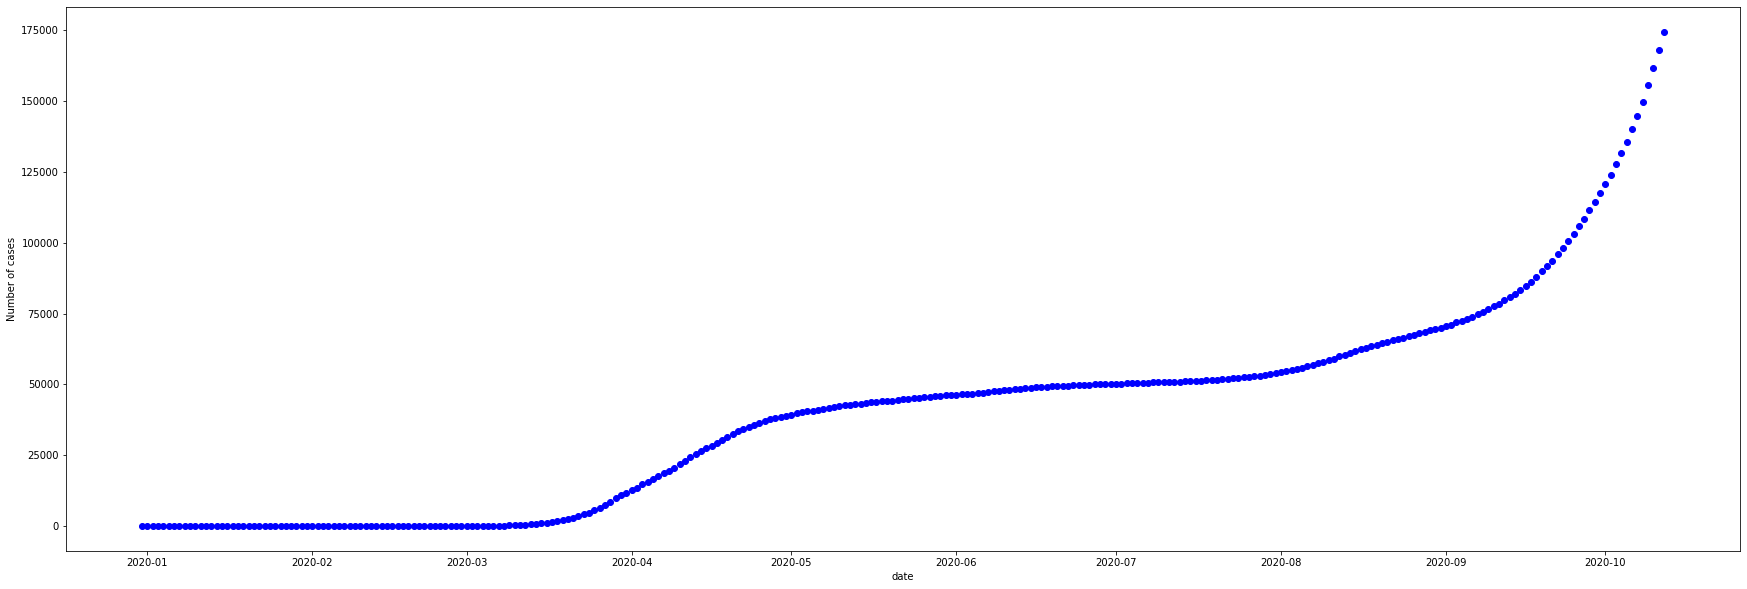

In [35]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

Now we can calculate the the Linear Regression based on the information from the plot. We use the train test split function from the SKLearn library. This allows us to devide information.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

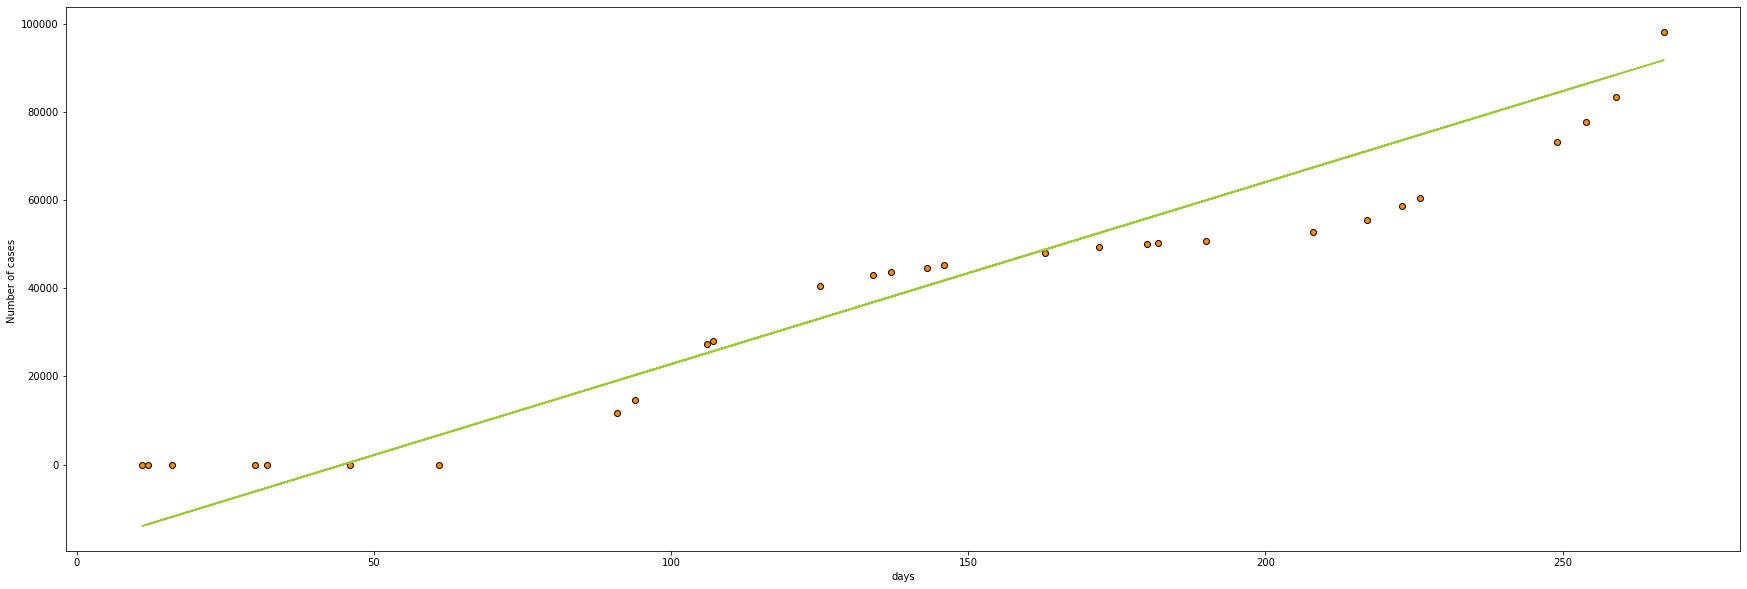

In [36]:
# Get correct data 
df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

# Split information
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

# Create prediction trend
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

# plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, predictions, color="yellowgreen")
plt.xlabel('days')
plt.ylabel('Number of cases ')
plt.plot()

Right now we can calculate the accuracy of our prediction. Our prediction is calculate with the som: "r^2 = 1/n * sum(y - y_predicted) / 1/n * sum(y - y_mean)". Based on this we get a precentage behind the comma that returns us the accuracy score.

In [37]:
# Accuracy Score
r2 = lr.score(X_test, y_test)

# r^2 = 1/n * sum(y - y_predicted) / 1/n * sum(y - y_mean)
# score_2 = r2_score(y_test, predictions)

# this is the multiple R-squared of the prediction. This is measured how well the prediction line was predicted
# The score is quite impressive given the input data and the complex nature bahaviour of the virus. However, I think we can do better with other models  
print(r2)

0.901192356280821


##### Polynomial Regression
With a Polynomial Regression the user has the posibility to calculate information. It is familiar to the Linear Regression but the polynomial regression follows the pattern of the plotted datapoints. In this chapter you see an example of how a polynomial regression works. First we need to import our libraries

In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

Now we want to clear our dataset. We create a dataframe specially for the Netherlands to gain insights into the cases. Next we introduce two specific variables where we fill their information with the median information of that row. Then we save it as a array and set all the values in that are to integers.

In [39]:
# Import data and preperation
df = pd.read_csv("files/Case_PRB.csv")

# Retrieve the dataframe of the Netherlands
country_mask = (df['location'] == "Netherlands")
df = df[country_mask]

# Sets the values to the correct format
total_cases = df[['total_cases']].fillna(df.median())
new_cases = df[['new_cases']].fillna(df.median())

total_cases = np.array(total_cases['total_cases'])
new_cases = np.array(new_cases['new_cases'])

total_cases = total_cases.astype(int)
new_cases = new_cases.astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Now we want to plot all the information

[]

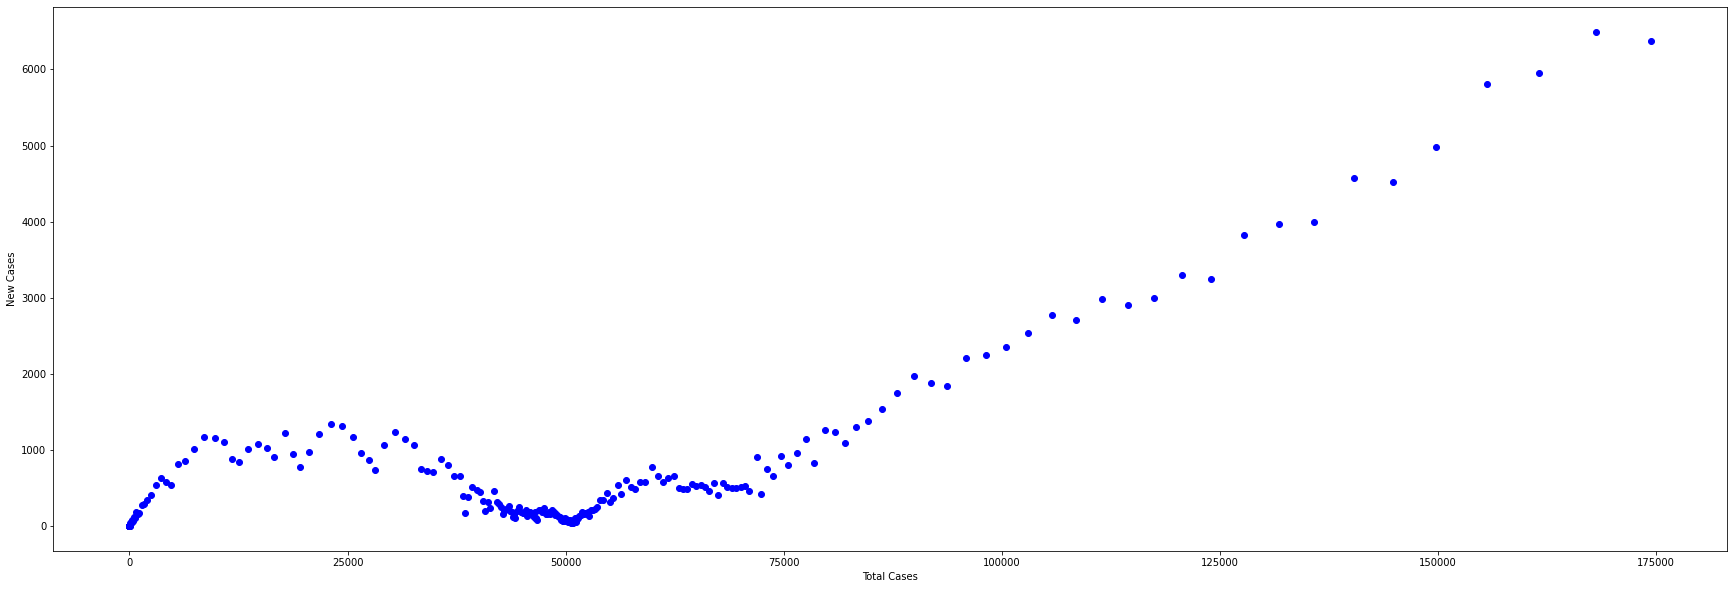

In [40]:

# Plotting the information
plt.scatter(total_cases, new_cases, color="blue")
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.plot()

The numpy package has the poly1d function that returns us a dimensional polynomial class. With the polyfit we can squares the polynomial fit based on the 4th degree. So on line one we get a 4th polynomial fit. The amount of points is the range of our line. The xp variable will set a starting point on zero, with the amount of points, with a number of sapmples to generate. After this we plot the line

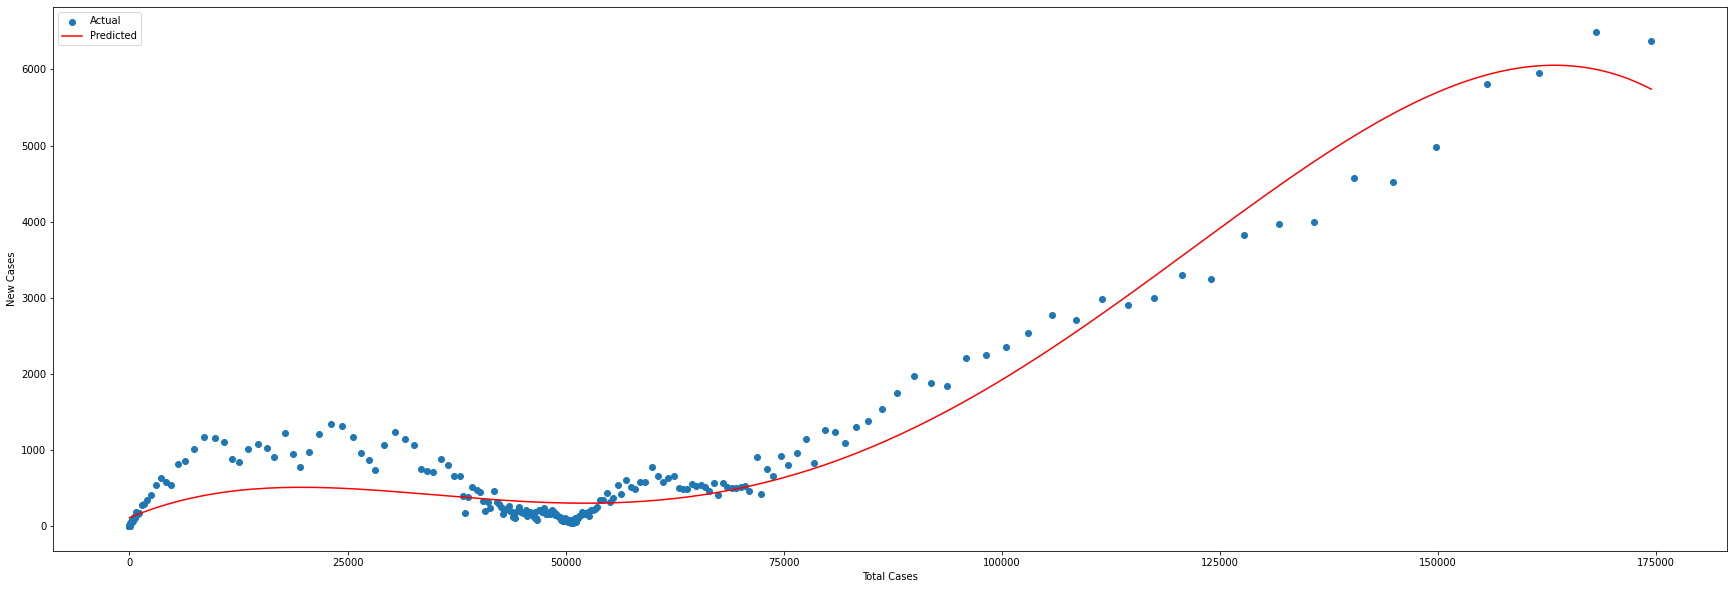

In [41]:
# Creates the train testing
X_train, X_test, y_train, y_test = train_test_split(total_cases, new_cases)

# Creates the polyfit function
p4 = np.poly1d(np.polyfit(X_test, y_test, 4))

# Prepares the information to be executed
amount_of_points = total_cases[-1] # Gets last value from array
xp = np.linspace(0, amount_of_points, 200)

plt.xlabel("Total Cases")
plt.ylabel("New Cases")

# Plotting the information
plt.scatter(total_cases, new_cases, label="Actual")
plt.plot(xp, p4(xp), c='r', label="Predicted")
plt.legend()
plt.show()

##### Multi Polynomial Regression
With a Multi Polynomial Regression gives the user the ability to determine the relative influence of one or more predictor variables. For multiple linear regression you can plot multiple regressions into one graph. If you plot data based on regression values that correlate with each other (for example, the amount of covid deaths, and population) you can conclude that one country acted faster than another country. But first we need to import the libraries.

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In every case we need to clear our dataset. We first import our information and then clear out all the information and only extent dataset by country. We clean our information by using the fillna function to set all the NaN values to 0 and then we arange? our time column data.

In [47]:
# Data preparation
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)
df = df[(df['location'] == "Italy")]
df['time'] = np.arange(len(df.index))

# Population
total_population = df.iloc[0]['population']

60461828.0
60461828.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


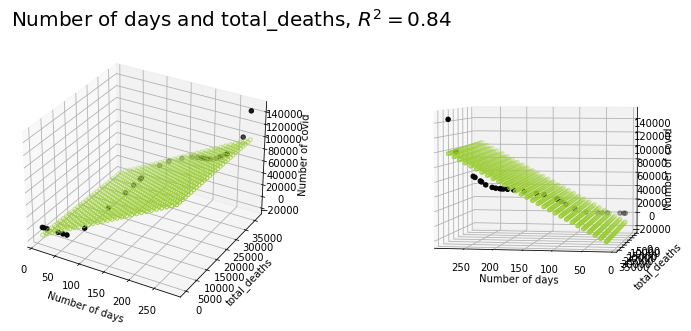

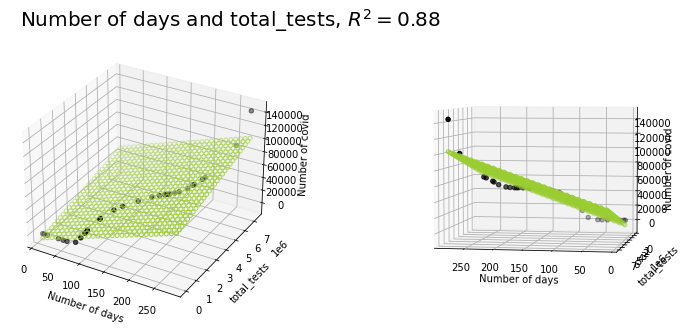

In [45]:
# Create Columns
cs = ['total_deaths', 'total_tests']

# Weet niet
for i in cs:
  X2  = df[["time", i]]
  y = df_netherlands[['total_cases']]

  # Split data into train (90%) and test (10%)
  X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size =0.1, random_state = 0)

  # Preparing data for visualization
  x_pred = np.linspace(X_test['time'].min(), X_test['time'].max(), 29) 
  y_pred = np.linspace(X_test[i].min(), X_test[i].max(), 29) 

  xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
  model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

  # Train
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  predictions = lr.predict(model_viz)

  # Evaluate
  r2 = lr.score(X_test, y_test)
  r2

  # Plot
  fig = plt.figure(figsize=(20, 5))

  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')

  axes = [ax1, ax2]

  for ax in axes:
    ax.scatter(X_test['time'], X_test[i], y_test, c='black')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predictions, facecolor=(0,0,0,0), s=15, edgecolor='yellowgreen')
    ax.set_xlabel('Number of days')
    ax.set_ylabel(i) # filter out _ char
    ax.set_zlabel('Number of covid')
    ax.locator_params(nbins=7, axis='x')

  fig.suptitle('Number of days and {0}, $R^2 = %.2f$'.format(i) % r2, fontsize=20, x=0.3)

  ax2.view_init(elev=4, azim=100)